# Position of quasar

You measure the position of a quasar *N*  times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma =0.2$

## Part 1
- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the know $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu, \sigma)$.
- Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset ${x_i}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using np.argsort)
- Compare it with the MLE estimator derived above.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats

The maximum likelihood is: 1.007007007007007 instead, the true value is: 1


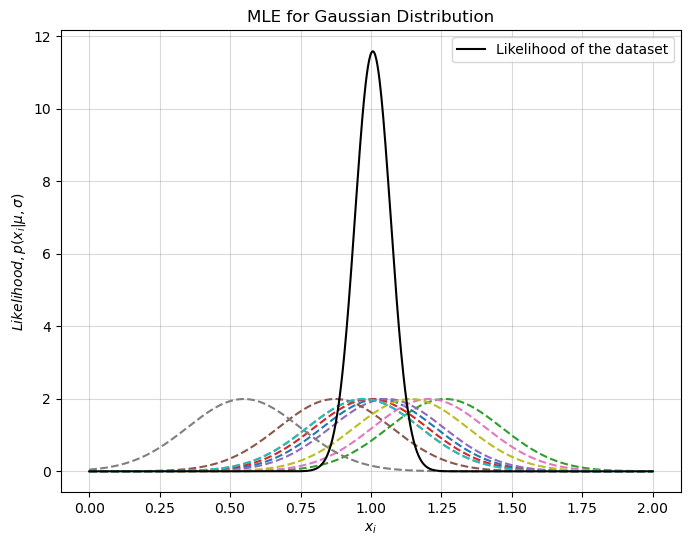

In [16]:
#Set the mean and the sigma, generate 10 gaussians that represent the probability of each point
N = 10
sigma = 0.2
mean = 1
sample = np.random.normal(mean, sigma, N)

#Plot of the gaussians of each point
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.grid(alpha=0.3, c = 'grey')
ax.set_xlabel('$x_i$')
ax.set_ylabel('$Likelihood, p(x_i|\mu, \sigma)$')
ax.set_title('MLE for Gaussian Distribution')

gauss = []
x = np.linspace(0, 2, 1000)#X axis

for i in sample:
    y = norm.pdf(x, i, sigma)
    gauss.append(y)
    ax.plot(x, y, linestyle='--')

#Product of the gaussians, the likelihood of the sample 
Likelihood = np.prod(gauss, axis = 0)

ax.plot(x, Likelihood, label='Likelihood of the dataset', c='black')
ax.legend()

#Sort the indexes of product so that the last number is the index of the maximum of product
indexes = np.argsort(Likelihood)
max = indexes[-1]
mu = x[max]

print('The maximum likelihood is:', mu, 'instead, the true value is:', mean)

## Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^{nd}$ order differentation of our log-likelihood function with np.diff.
- divide through by our $\Delta\theta^2$ to get the correct normalization.
- multiply by -1.
- then take the square root.
- Compare with the Fisher matrix error derived above.
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees).

In [17]:
#The mean error that we expect to obtain
sigma_mu_true = sigma/np.sqrt(N)

#Loglikelihood
log_like = np.log(Likelihood)

#To derive the mean error we need the second derivative of loglikelihood evaluated in mu, which is the abscissa of maximum of the likelihood 
delta_log = np.diff(log_like, 2)
delta_theta = (x[1]-x[0])**2
sigma_mus = 1/np.sqrt(-(delta_log/delta_theta)) #Fisher matrix to the -1/2
sigma_mu = sigma_mus[max]

print('The mean error is:', sigma_mu, 'instead, the true value is:', sigma_mu_true)

The mean error is: 0.06324555320340307 instead, the true value is: 0.06324555320336758


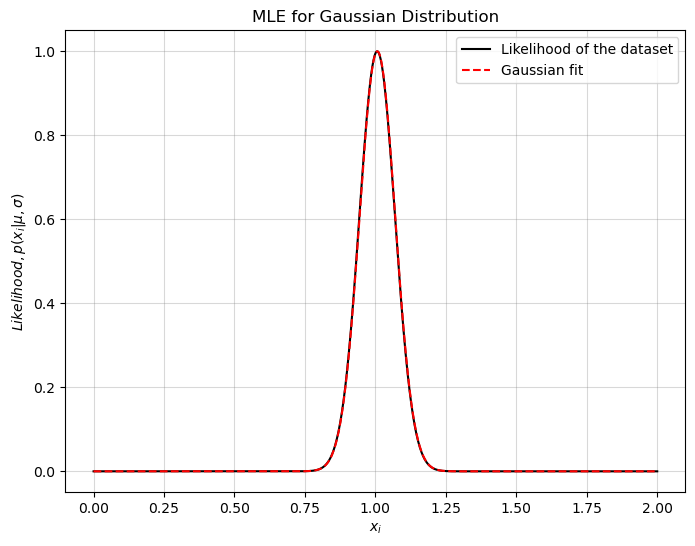

In [19]:
gauss = scipy.stats.norm(loc=x[max], scale= sigma_mu)

fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.gca()
ax1.grid(alpha=0.3, c = 'grey')
ax1.set_xlabel('$x_i$')
ax1.set_ylabel('$Likelihood, p(x_i|\mu, \sigma)$')
ax1.plot(x, Likelihood/np.max(Likelihood), label='Likelihood of the dataset', c='black')
ax1.plot(x, gauss.pdf(x)/np.max(gauss.pdf(x)), c = 'red', label='Gaussian fit', ls = 'dashed')
ax1.set_title('MLE for Gaussian Distribution')
ax1.legend()

## Third part

Let's make our model more realistic. Our *N* measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distributed with mean 0.2 and standard deviation 0.05
- Generalize your code from above to this case

The maximum likelihood is: 0.986986986986987 instead, the true value is: 1
The mean error is: 0.057969940760228406 instead, the true value is: 0.06324555320336758


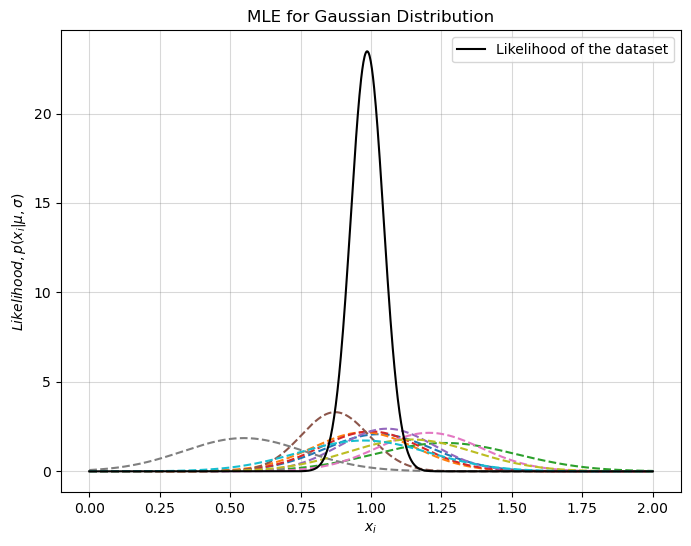

In [21]:
#Set the mean of the sigmas, the std of the sigmas, generate the sigmas
mean_sigmas = 0.2
sigma_sigmas = 0.05
sigmas =  np.random.normal(mean_sigmas, sigma_sigmas, N)

fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.gca()
ax2.grid(alpha=0.3, c = 'grey')
ax2.set_xlabel('$x_i$')
ax2.set_ylabel('$Likelihood, p(x_i|\mu, \sigma)$')
ax2.set_title('MLE for Gaussian Distribution')
  
gauss_new = []

#Plot of the gaussians of each point but now with different sigmas
for i in range(N):
    y_new = norm.pdf(x, sample[i], sigmas[i])
    gauss_new.append(y_new)
    ax2.plot(x, y_new, linestyle='--')

#Product of the gaussians, the likelihood of the sample 
Likelihood_new = np.prod(gauss_new, axis = 0)
ax2.plot(x, Likelihood_new, label='Likelihood of the dataset', c='black')
ax2.legend()
#sort the indexes of product so that the last number is the index of the maximum of product
indexes_new = np.argsort(Likelihood_new)
max = indexes_new[-1]
mu = x[max]

print('The maximum likelihood is:', mu, 'instead, the true value is:', mean)

#Loglikelihood
log_like_new = np.log(Likelihood_new)

#The mean error that we expect to obtain
sigma_mu_true_new = 1/np.sqrt(np.sum(1/sigmas**2))

#To derive the mean error we need the second derivative of loglikelihood evaluated in mu, which is the abscissa of maximum of the likelihood 
delta_log_new = np.diff(log_like_new, 2)
sigma_mus = 1/np.sqrt(-(delta_log_new/delta_theta)) #Fisher matrix to the -1/2
sigma_mu = sigma_mus[max]

print('The mean error is:', sigma_mu, 'instead, the true value is:', sigma_mu_true)

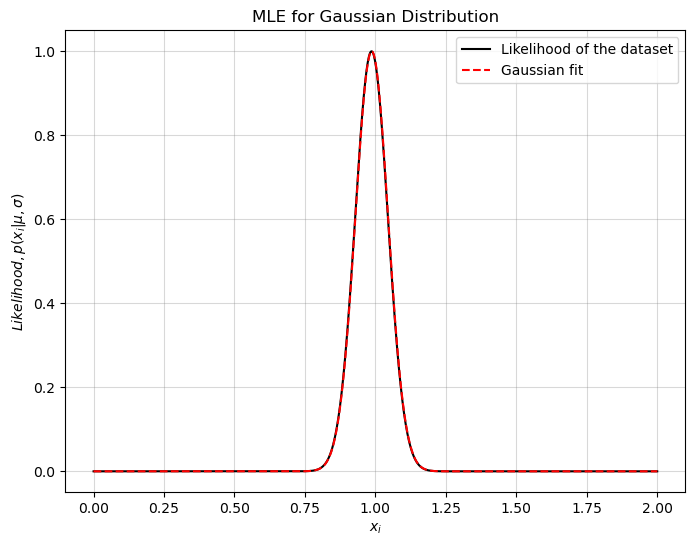

In [26]:
#Plot the gaussian with the found mu and sigma_mu
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.gca()
ax3.grid(alpha=0.3, c = 'grey')
ax3.set_xlabel('$x_i$')
ax3.set_ylabel('$Likelihood, p(x_i|\mu, \sigma)$')
ax3.set_title('MLE for Gaussian Distribution')
gauss = scipy.stats.norm(loc=mu, scale= sigma_mu)
ax3.plot(x, Likelihood_new/np.max(Likelihood_new), label='Likelihood of the dataset', c='black')
ax3.plot(x, gauss.pdf(x)/np.max(gauss.pdf(x)), c = 'red', label='Gaussian fit', ls = 'dashed')
ax3.legend()